#### Project (classification) - Machine Failure 

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

#### Read the Dataset

In [2]:
import pandas as pd


In [3]:
df = pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [4]:
df.shape

(136429, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

#### Check Missing Values in Dataframe

In [6]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [7]:
df.nunique()

id                         136429
Product ID                   9976
Type                            3
Air temperature [K]            95
Process temperature [K]        81
Rotational speed [rpm]        952
Torque [Nm]                   611
Tool wear [min]               246
Machine failure                 2
TWF                             2
HDF                             2
PWF                             2
OSF                             2
RNF                             2
dtype: int64

In [8]:
df['Type'].unique()

array(['L', 'M', 'H'], dtype=object)

In [9]:
df['Machine failure'].value_counts()

Machine failure
0    134281
1      2148
Name: count, dtype: int64

<Axes: xlabel='Machine failure'>

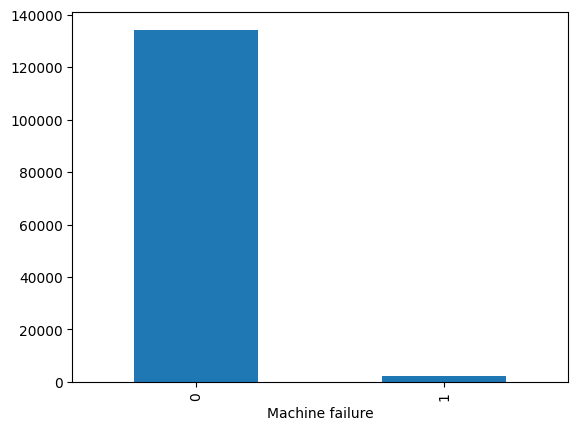

In [10]:
df['Machine failure'].value_counts().plot(kind='bar')

#### Seperate x and y 

In [11]:
x = df.drop(columns=['id','Product ID','Machine failure'],axis=1)
y = df[['Machine failure']]

In [12]:
x.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [13]:
y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


#### Seperate cat and con features

In [14]:
cat = list(x.columns[x.dtypes=='object'])
con = list(x.columns[x.dtypes!='object'])

In [15]:
cat

['Type']

In [16]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

#### Create a Simple pipeline for feature selection

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [18]:
# Numeric Pipeline
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

# Categorical Pipeline
cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                           ('ordinal',OrdinalEncoder())])

# Combine both Pipeline
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)])

In [19]:
x_pre = pre.fit_transform(x)
x_pre

array([[ 0.3958803 , -0.24623038,  0.54541592, ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ..., -0.06303833,
        -0.04756777,  2.        ],
       [-0.30220363, -1.04035788,  2.05187289, ..., -0.06303833,
        -0.04756777,  1.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ..., -0.06303833,
        -0.04756777,  1.        ],
       [-1.59097397, -1.32913151,  0.26430672, ..., -0.06303833,
        -0.04756777,  1.        ]])

In [20]:
cols = pre.get_feature_names_out()
cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type'], dtype=object)

In [21]:
x_pre = pd.DataFrame(x_pre,columns=cols)
x_pre

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
...,...,...,...,...,...,...,...,...,...,...,...
136424,0.127386,1.053251,0.069693,-0.335048,1.650769,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
136425,-1.268781,-1.040358,-0.528565,1.029305,-1.601020,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0
136426,0.342182,1.342025,0.026445,-0.217431,1.713303,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
136427,0.986567,0.692284,-0.528565,0.699979,-0.975676,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0


#### Calculating Mutual Information Scores

In [22]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(x_pre,y)
mi

array([0.00536034, 0.00210534, 0.01945648, 0.01975328, 0.0067235 ,
       0.00804609, 0.02456927, 0.0121478 , 0.01925498, 0.00179492,
       0.01121026])

In [23]:
mi = pd.Series(mi)
mi.index = cols
mi = mi.sort_values(ascending=False)
mi

num__HDF                        0.024569
num__Torque [Nm]                0.019753
num__Rotational speed [rpm]     0.019456
num__OSF                        0.019255
num__PWF                        0.012148
cat__Type                       0.011210
num__TWF                        0.008046
num__Tool wear [min]            0.006723
num__Air temperature [K]        0.005360
num__Process temperature [K]    0.002105
num__RNF                        0.001795
dtype: float64

<Axes: title={'center': 'Mutual Information Scores'}>

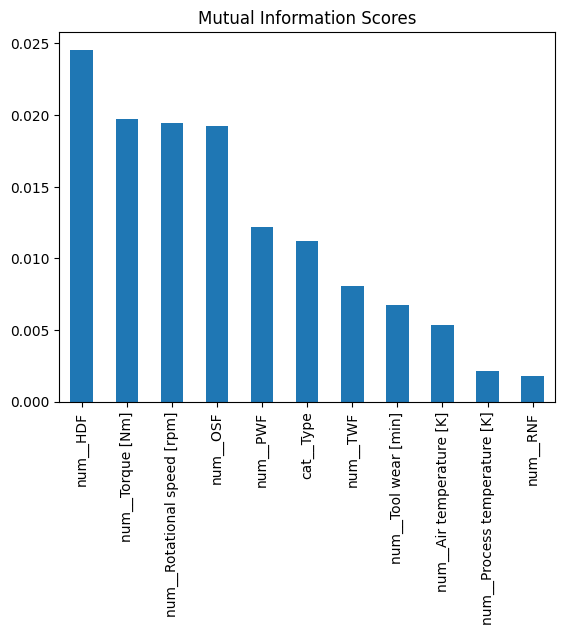

In [24]:
mi.plot(kind='bar',title='Mutual Information Scores')

#### Build the final pipeline

In [25]:
# Numeric Pipeline
num_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

# Categorical Pipeline
cat_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore'))])

# Combine both Pipeline
pre1 = ColumnTransformer([('num',num_pipe1,con),
                         ('cat',cat_pipe1,cat)])


In [26]:
x_pre1 = pre1.fit_transform(x)
x_pre1

array([[ 0.3958803 , -0.24623038,  0.54541592, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ...,  0.        ,
         0.        ,  1.        ],
       [-0.30220363, -1.04035788,  2.05187289, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ...,  0.        ,
         1.        ,  0.        ],
       [-1.59097397, -1.32913151,  0.26430672, ...,  0.        ,
         1.        ,  0.        ]])

In [27]:
cols1 = pre1.get_feature_names_out()
cols1

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type_H', 'cat__Type_L',
       'cat__Type_M'], dtype=object)

In [28]:
x_pre1 = pd.DataFrame(x_pre1,columns=cols1)
x_pre1

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,0.127386,1.053251,0.069693,-0.335048,1.650769,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
136425,-1.268781,-1.040358,-0.528565,1.029305,-1.601020,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0,0.0
136426,0.342182,1.342025,0.026445,-0.217431,1.713303,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
136427,0.986567,0.692284,-0.528565,0.699979,-0.975676,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


#### Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_pre1,y,test_size=0.2,random_state=42)

In [30]:
xtrain.shape

(109143, 13)

In [31]:
xtest.shape

(27286, 13)

#### Algorithms Evaluation (For best model selection)
* Logistic Regression
* DecisionTree Classifier
* RandomForestTree Classifier
* GradientBoosting Classifier

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier



In [33]:
dct = {'LogisticRegression': LogisticRegression(),
       'DecisionTree' : DecisionTreeClassifier(),
       'RandomForest' : RandomForestClassifier(),
       'GradientBoosting' : GradientBoostingClassifier()}

In [34]:
dct.items()

dict_items([('LogisticRegression', LogisticRegression()), ('DecisionTree', DecisionTreeClassifier()), ('RandomForest', RandomForestClassifier()), ('GradientBoosting', GradientBoostingClassifier())])

In [35]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

tr = []
tr_cv = []
ts = []

for name,model in dct.items():
    # Fit the Model on training data
    model.fit(xtrain,ytrain)
    
    # Predict train and test results
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    
    # Calculate F1 Score for Training Data
    f1_tr = f1_score(ytrain,ypred_tr)
    
    # Calculate F1 Score for Croos Validated Results
    score = cross_val_score(model,xtrain,ytrain,cv=5,scoring='f1')
    f1_tr_cv = score.mean()
    
    # Calculate F1 Score for Testing Data
    f1_ts = f1_score(ytest,ypred_ts)
    
    # Append all values in list
    tr.append(f1_tr)
    tr_cv.append(f1_tr_cv)
    ts.append(f1_ts)
    
    # Print the Results
    print(f'Model Name : {name}\n')
    print(f'F1 Training : {f1_tr:.4f}')
    print(f'F1 Training CV : {f1_tr_cv:.4f}')
    print(f'F1 Testing : {f1_ts:.4f}')
    print('\n====================================================\n')
    
    
    

Model Name : LogisticRegression

F1 Training : 0.8625
F1 Training CV : 0.8622
F1 Testing : 0.8649


Model Name : DecisionTree

F1 Training : 0.9950
F1 Training CV : 0.7472
F1 Testing : 0.7629


Model Name : RandomForest

F1 Training : 0.9950
F1 Training CV : 0.8576
F1 Testing : 0.8656


Model Name : GradientBoosting

F1 Training : 0.8732
F1 Training CV : 0.8586
F1 Testing : 0.8637




In [36]:
eval_dct = {'Model_name' : list(dct.keys()),
            'TrainF1' : tr,
            'TrainF1CV' : tr_cv,
            'TestF1' : ts}

In [37]:
df_eval = pd.DataFrame(eval_dct)
df_eval

,Model_name,TrainF1,TrainF1CV,TestF1
0,LogisticRegression,0.862525,0.862230,0.864865
1,DecisionTree,0.995007,0.747193,0.762864
2,RandomForest,0.995025,0.857577,0.865557
3,GradientBoosting,0.873239,0.858565,0.863694


In [38]:
df_eval.sort_values(by='TestF1',ascending=False)

,Model_name,TrainF1,TrainF1CV,TestF1
2,RandomForest,0.995025,0.857577,0.865557
0,LogisticRegression,0.862525,0.862230,0.864865
3,GradientBoosting,0.873239,0.858565,0.863694
1,DecisionTree,0.995007,0.747193,0.762864


##### you can choose LR Or GBC because both testf1 score is good
* selcet LR as best model here

#### Hyperparameter tunning for Logistic Regression

In [39]:
params = { 'C' : [0.001,0.01,0.1,1,10,50,100,1000]}

In [40]:
from sklearn.model_selection import RandomizedSearchCV
lr = LogisticRegression()
rscv = RandomizedSearchCV(lr,param_distributions=params,cv=5,scoring='f1')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 50, 100,
                                              1000]},
                   scoring='f1')

In [41]:
rscv.best_params_

{'C': 0.1}

In [42]:
rscv.best_score_

0.862513786746223

In [43]:
best_lr = rscv.best_estimator_
best_lr

LogisticRegression(C=0.1)

##### Evaluate the best model

In [44]:
best_lr.score(xtrain,ytrain)

0.9961976489559569

In [45]:
best_lr.score(xtest,ytest)

0.9961518727552591

In [46]:
ypred_tr = best_lr.predict(xtrain)
ypred_ts = best_lr.predict(xtest)

In [47]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [48]:
ytrain.head()

,Machine failure
12407,0
85011,0
65292,0
18478,0
100267,0


In [49]:
ypred_ts[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [50]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


##### Draw a confusion matrix


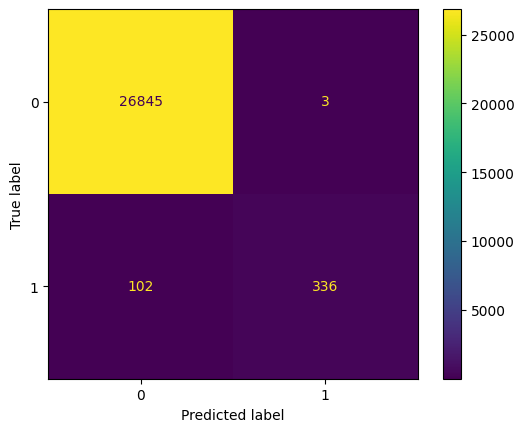

In [51]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=best_lr.classes_)
cfd.plot()

##### Classification Report

In [52]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.99      0.77      0.86       438

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286



#### Plotting ROC_AUC Curve

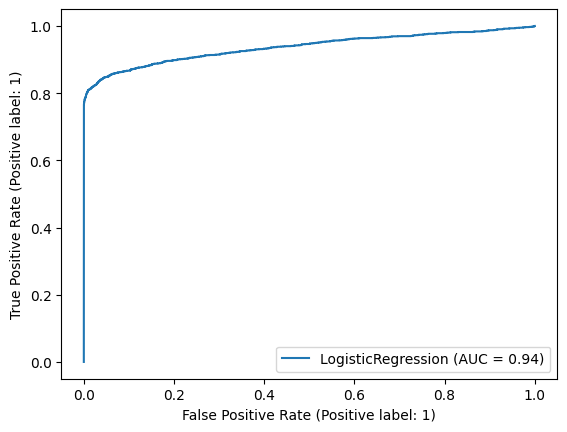

In [53]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_lr,xtrain,ytrain)

#### Predicting the test.csv dataset

In [54]:
xnew = pd.read_csv('test.csv')
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [55]:
xnew.shape

(90954, 13)

In [56]:
xnew_pre = pre1.transform(xnew)
xnew_pre

array([[ 1.30875929,  1.12544438, -0.15375311, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.98656671,  0.76447734,  1.3887435 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.77177165,  0.33131689,  0.03365302, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-2.2890579 , -2.70080627, -0.13933725, ...,  0.        ,
         1.        ,  0.        ],
       [-0.9465888 , -1.54571174,  0.09852438, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.95314446,  2.06395869,  0.09852438, ...,  0.        ,
         1.        ,  0.        ]])

In [57]:
xnew_pre = pd.DataFrame(xnew_pre,columns=cols1)
xnew_pre

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,1.308759,1.053251,-0.261872,0.006040,-1.397783,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
90950,-1.053986,-0.101844,0.156188,-0.770229,-1.147645,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
90951,-2.289058,-2.700806,-0.139337,0.123657,1.291196,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
90952,-0.946589,-1.545712,0.098524,-0.005721,-0.553568,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


In [58]:
# Predict probabilities and predection values

preds = best_lr.predict(xnew_pre)
probs = best_lr.predict_proba(xnew_pre)[:,1]

In [59]:
preds[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [60]:
probs[0:5]

array([0.00222472, 0.001099  , 0.00270896, 0.00308788, 0.00386246])

#### Creating results in new data


In [61]:
test_df_res = xnew[['id']]
test_df_res


,id
0,136429
1,136430
2,136431
3,136432
4,136433
...,...
90949,227378
90950,227379
90951,227380
90952,227381


In [62]:
test_df_res['Machine_Failure'] = preds
test_df_res['Probability'] = probs

In [63]:
test_df_res

,id,Machine_Failure,Probability
0,136429,0,0.002225
1,136430,0,0.001099
2,136431,0,0.002709
3,136432,0,0.003088
4,136433,0,0.003862
...,...,...,...
90949,227378,0,0.002335
90950,227379,0,0.000514
90951,227380,0,0.003062
90952,227381,0,0.002405


In [64]:
test_df_res['Machine_Failure'].value_counts()

Machine_Failure
0    89849
1     1105
Name: count, dtype: int64

<Axes: xlabel='Machine_Failure'>

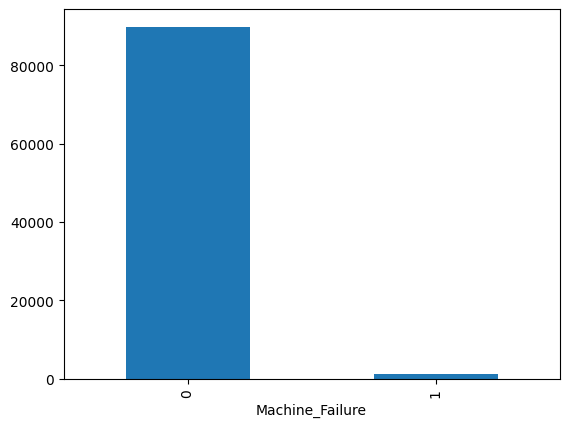

In [65]:
test_df_res['Machine_Failure'].value_counts().plot(kind='bar')

There are 1105 machine failed in testing data file

In [66]:
test_df_res[test_df_res['Machine_Failure']==1]

,id,Machine_Failure,Probability
17,136446,1,0.992193
209,136638,1,0.995085
223,136652,1,0.987978
397,136826,1,0.996171
405,136834,1,0.997852
...,...,...,...
90503,226932,1,0.987178
90665,227094,1,0.999689
90679,227108,1,0.683119
90784,227213,1,0.983046


#### Save the data to csv

In [67]:
test_df_res.to_csv('Machin_fail_pred.csv',index=False)